In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for pretty plots
sns.set(style="whitegrid")

In [2]:
# Load the cleaned dataset
df = pd.read_csv("../data/raw/cleaned_data.csv")

# Preview
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,...,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),pymnt_plan_y,initial_list_status_w,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
0,68407277,3600.0,3600.0,3600.0,36.0,13.99,123.03,13,34726,1,...,0,1,0,0,0,0,1,0,0,0
1,68355089,24700.0,24700.0,24700.0,36.0,11.99,820.28,10,10350,1,...,0,1,0,0,0,0,1,0,0,0
2,68341763,20000.0,20000.0,20000.0,60.0,10.78,432.66,8,37267,1,...,0,1,0,0,0,0,1,1,0,0
3,66310712,35000.0,35000.0,35000.0,60.0,14.85,829.90,14,14327,1,...,0,0,0,0,0,0,1,0,0,0
4,68476807,10400.0,10400.0,10400.0,60.0,22.45,289.91,25,6473,3,...,0,1,0,0,0,0,1,0,0,0


In [3]:
# Shape & Info
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (100000, 107)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 107 entries, id to debt_settlement_flag_Y
dtypes: float64(71), int64(36)
memory usage: 81.6 MB


In [4]:
# Missing Values
df.isnull().sum().sort_values(ascending=False).head(10)

id                      0
total_bal_ex_mort       0
tax_liens               0
pub_rec_bankruptcies    0
percent_bc_gt_75        0
pct_tl_nvr_dlq          0
num_tl_op_past_12m      0
num_tl_90g_dpd_24m      0
num_tl_30dpd            0
num_tl_120dpd_2m        0
dtype: int64

In [5]:
# Descriptive Stats
df.describe().T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
id,6.532613e+07,2.437069e+06,56705.0,68617057.0
loan_amnt,1.505586e+04,8.641837e+03,1000.0,35000.0
funded_amnt,1.505586e+04,8.641837e+03,1000.0,35000.0
funded_amnt_inv,1.504711e+04,8.636873e+03,900.0,35000.0
term,4.366728e+01,1.119057e+01,36.0,60.0
...,...,...,...,...
pymnt_plan_y,1.500000e-04,1.224659e-02,0.0,1.0
initial_list_status_w,7.781800e-01,4.154728e-01,0.0,1.0
application_type_Joint App,5.020000e-03,7.067425e-02,0.0,1.0
hardship_flag_Y,2.000000e-04,1.414079e-02,0.0,1.0


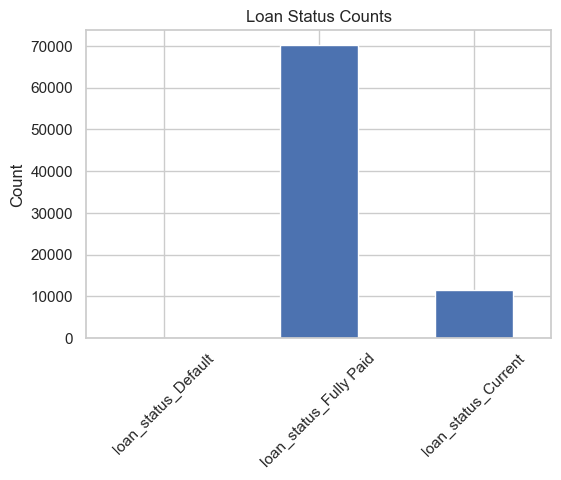

In [6]:
# Loan Status Counts
status_cols = ['loan_status_Default', 'loan_status_Fully Paid', 'loan_status_Current']

df[status_cols].sum().plot(kind="bar", figsize=(6,4), title="Loan Status Counts")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

/var/folders/xs/cktdv13x0ys63d0t9x65nw8c0000gn/T/ipykernel_50054/2776181024.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="default", palette="pastel")


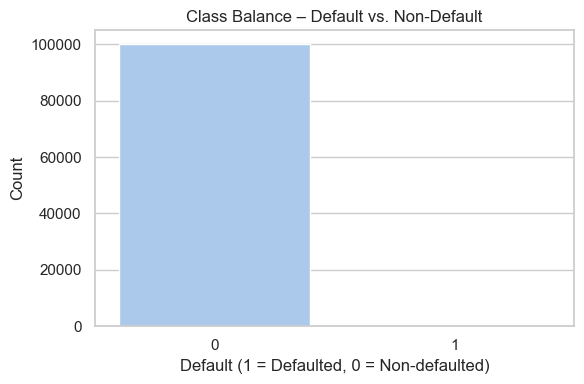

In [12]:
# Create the 'default' column from one-hot encoded 'loan_status_Default'
df["default"] = df["loan_status_Default"]

# Class Balance Visualization
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="default", palette="pastel")
plt.title("Class Balance – Default vs. Non-Default")
plt.xlabel("Default (1 = Defaulted, 0 = Non-defaulted)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

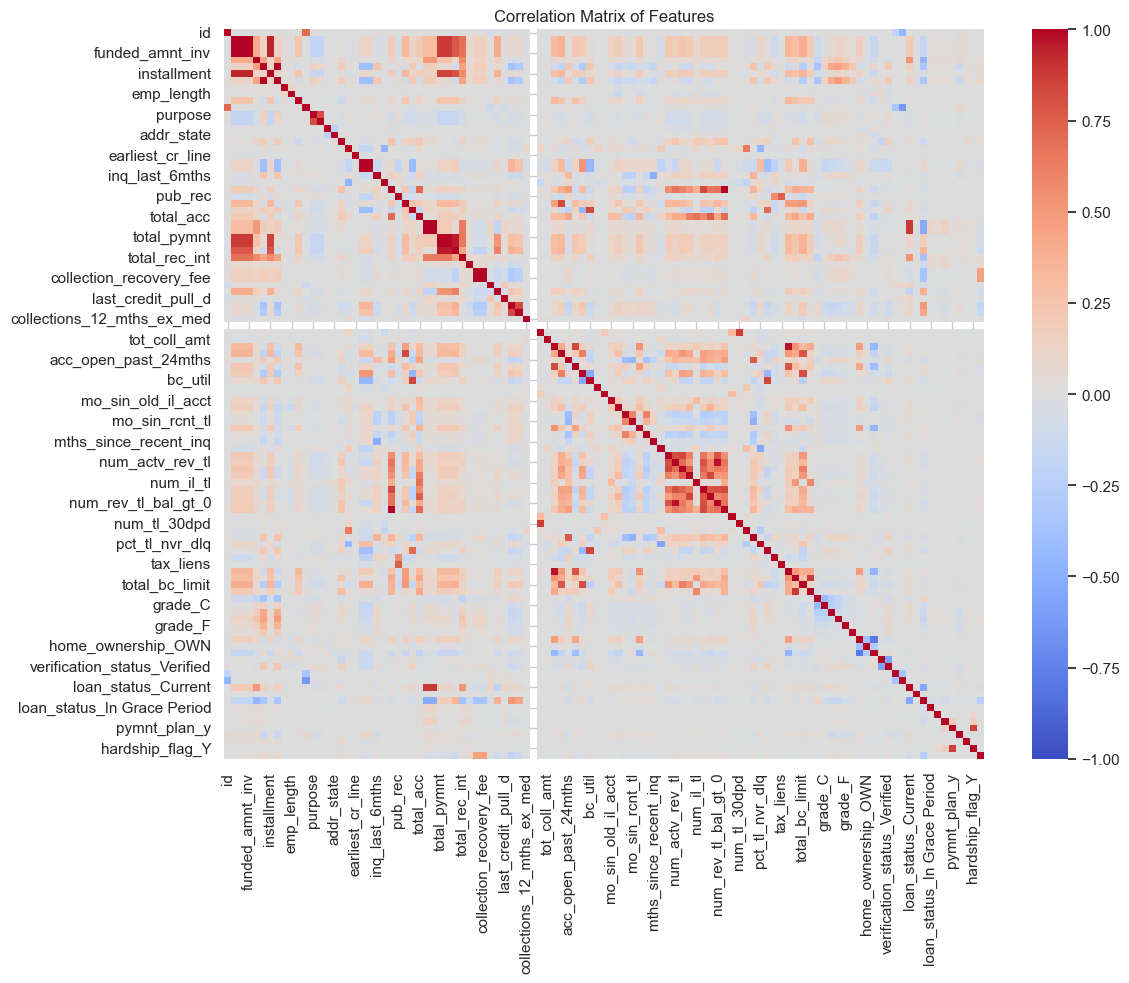

In [7]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()

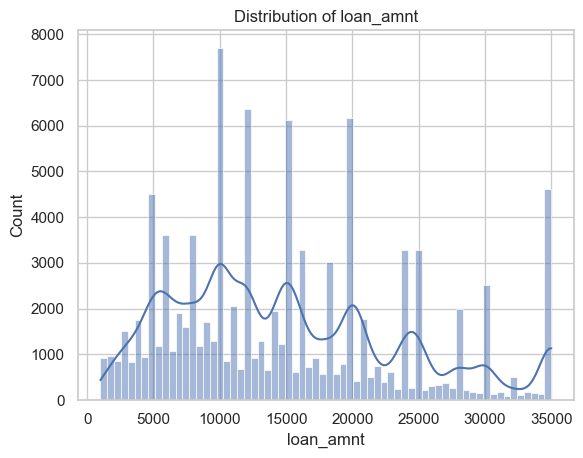

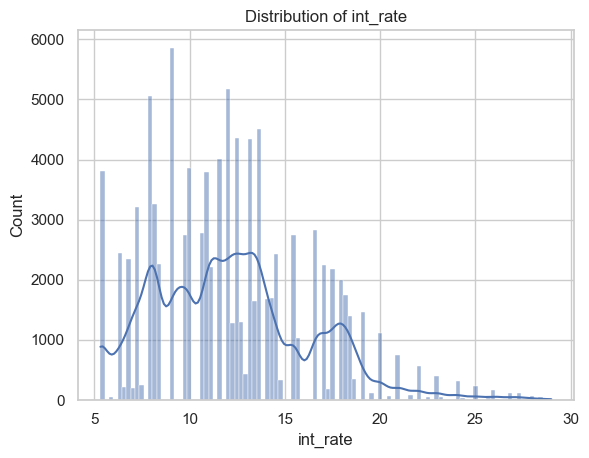

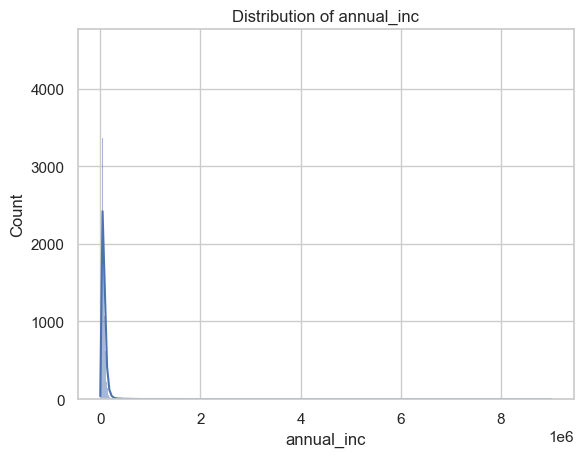

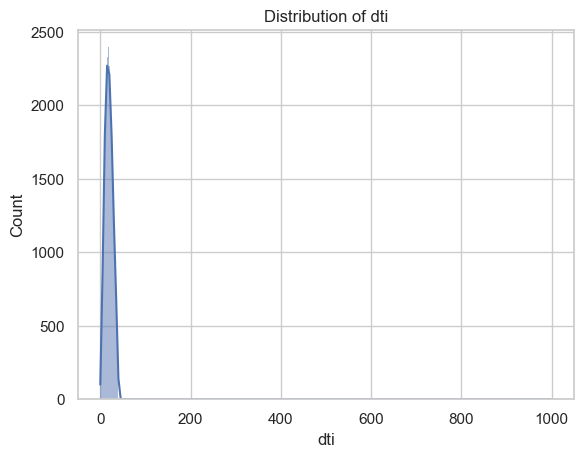

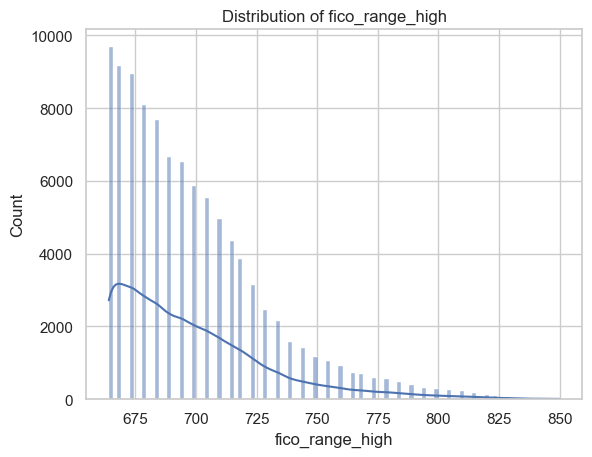

In [8]:
# Feature Distributions (Loan Amount, DTI, Income)
important_numeric = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'fico_range_high']

for col in important_numeric:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()